<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:
movies.sort_values('duration').head(1)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


In [7]:
movies.sort_values('duration').tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

<AxesSubplot:>

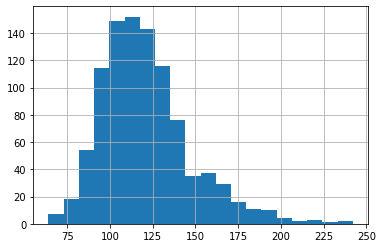

In [8]:
# Answer:
movies['duration'].hist(bins=20)

#### Use a box plot to display that same data.

<AxesSubplot:>

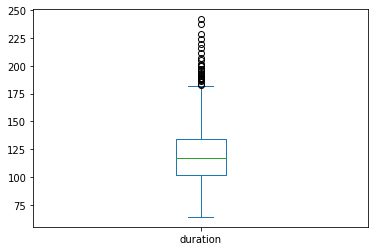

In [9]:
# Answer:
movies['duration'].plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
# Answer:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, 'Number of Movies')

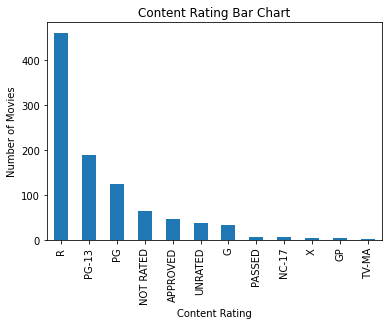

In [11]:
# Answer:
cRating_count = movies['content_rating'].value_counts()
cRating_count.plot(kind='bar', title='Content Rating Bar Chart')
plt.xlabel('Content Rating')
plt.ylabel('Number of Movies')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [12]:
# Answer:
movies['content_rating'].replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace=True)

In [13]:
movies.head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [14]:
# Answer:
movies['content_rating'].replace(['X', 'TV-MA'], 'NC-17', inplace=True)

#### Count the number of missing values in each column.

In [15]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [16]:
# Answer:
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [17]:
movies['content_rating'].fillna('UNRATED', inplace=True)

In [18]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [19]:
# Answer:
print('The average star rating for movies 2 hours or longer is {}'.format(movies[movies['duration'] >= 120]['star_rating'].mean()))
print('The average star rating for movies shorter than 2 hours is {}'.format(movies[movies['duration'] < 120]['star_rating'].mean()))

The average star rating for movies 2 hours or longer is 7.948898678414097
The average star rating for movies shorter than 2 hours is 7.838666666666665


#### Use a visualization to detect whether there is a relationship between duration and star rating.

<AxesSubplot:title={'center':'duration'}, xlabel='star_rating'>

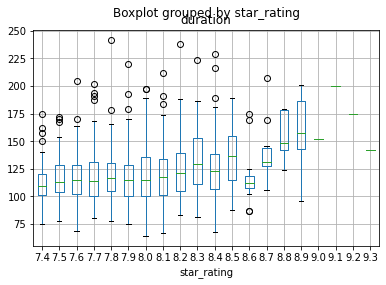

In [20]:
# Answer:
movies.boxplot(column='duration', by='star_rating')

Figure above shows us that movies below 2 hours are more likely to receive a rating.

#### Calculate the average duration for each genre.

In [21]:
# Answer:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

<AxesSubplot:title={'center':'duration'}, xlabel='content_rating'>

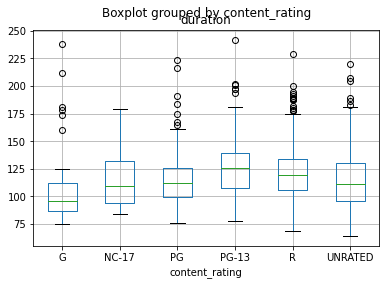

In [22]:
# Answer:
movies.boxplot(column='duration', by='content_rating')

#### Determine the top rated movie (by star rating) for each genre.

In [23]:
# Answer:
movies.groupby('genre').title.first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                   Life Is Beautiful
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [24]:
# Answer:
same_titles = movies[movies.title.duplicated()].title
movies[movies.title.isin(same_titles)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [25]:
# Answer:
movies.genre.value_counts()
top_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies[movies.genre.isin(top_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [26]:
# Answer:
genre_counts = movies.genre.value_counts()
top_genres = genre_counts[genre_counts >= 10].index
movies[movies.genre.isin(top_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [27]:
# Answer:
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [28]:
# Answer:
genre_ratings = movies.groupby('genre').star_rating.agg(['count', 'mean'])
genre_ratings[genre_ratings['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [29]:
#Find the actor that in the most of top 1000 movies imbd ranked 
def repp(string):
    return string.replace("[","").replace("]","").replace("u'","").replace("',",",")[:-1]
    
movies_series = movies['actors_list'].apply(repp)

actors_list = []
for movie_actors in movies_series:
    actors_list.append([e.strip() for e in movie_actors.split(',')])
    
actor_dict = {}
for actor in actors_list:
    for a in actor:
        if a in actor_dict:
            actor_dict[a] +=1
        else:
            actor_dict[a] = 1

max(actor_dict, key=actor_dict.get)
max(actor_dict.values())
print(max(actor_dict, key=actor_dict.get) +  " is the actor that most in top 1000 imdb ranked movies with {} movies".format(max(actor_dict.values())))

Robert De Niro is the actor that most in top 1000 imdb ranked movies with 18 movies
